In [1]:
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt

In [2]:
sample_continuous = np.random.chisquare(df=8, size=10000)
sample = np.array(list(map(int, sample_continuous)))

In [3]:
mean = np.mean(sample)

median = np.median(sample)

mode = sorted([(key, val) for key, val in Counter(sample).items()], key=lambda x : -x[1])[0][0]

print("""
mean: %.2f
median: %.2f
mode: %.2f
"""%(mean, median, mode))


mean: 7.44
median: 7.00
mode: 5.00



In [4]:
def l2_error(sample, estimator):
    return sum((sample - estimator) ** 2)

In [5]:
def l1_error(sample, estimator):
    return sum(abs(sample - estimator))

In [6]:
def l0_error(sample, estimator):
    return sum(sample != estimator)

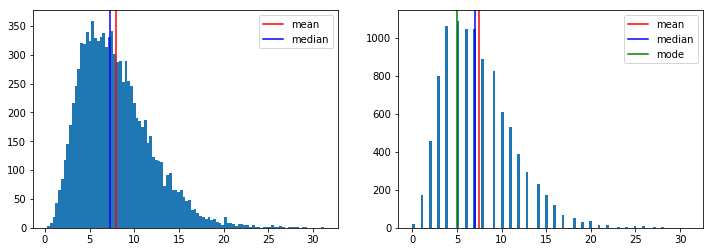

In [7]:
plt.figure(figsize=(12, 4))

ax1 = plt.subplot(1, 2, 1)
ax1.hist(sample_continuous, bins=100)
ax1.axvline(x = np.mean(sample_continuous), color='r')
ax1.axvline(x = np.median(sample_continuous), color='b')
ax1.legend(["mean", "median"])

ax2 = plt.subplot(1, 2, 2)
ax2.hist(sample, bins=100)

ax2.axvline(x = mean, color='r')
ax2.axvline(x = median, color='b')
ax2.axvline(x = mode, color='g')

ax2.legend(["mean", "median", "mode"])
plt.savefig("figs/chisquare.png")
plt.show()

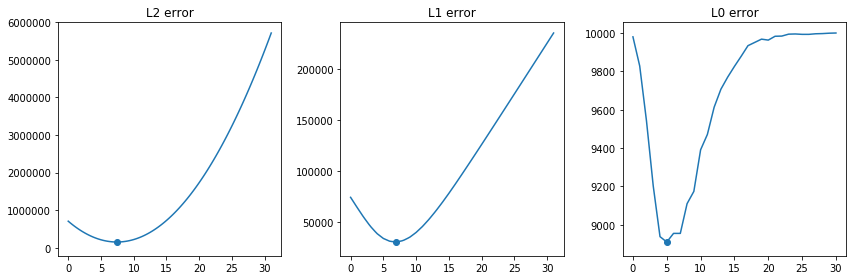

In [8]:
xs = np.linspace(0, max(sample), 100)

plt.figure(figsize=(12, 4))

ax1 = plt.subplot(1, 3, 1)
ax1.plot(xs, [l2_error(sample, x) for x in xs])
ax1.scatter(mean, l2_error(sample, mean))
ax1.set_title("L2 error")

ax2 = plt.subplot(1, 3, 2)
ax2.plot(xs, [l1_error(sample, x) for x in xs])
ax2.scatter(median, l1_error(sample, median))
ax2.set_title("L1 error")

xs = list(range(max(sample)))
ax3 = plt.subplot(1, 3, 3)
ax3.plot(xs, [l0_error(sample, x) for x in xs])
ax3.scatter(mode, l0_error(sample, mode))
ax3.set_title("L0 error")

plt.tight_layout()
plt.savefig("figs/error.png")

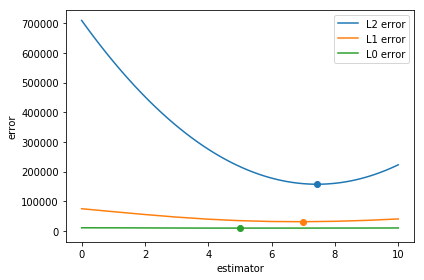

In [9]:
xs = np.linspace(0, 10, 100)

plt.plot(xs, [l2_error(sample, x) for x in xs])
plt.scatter(mean, l2_error(sample, mean))

plt.plot(xs, [l1_error(sample, x) for x in xs])
plt.scatter(median, l1_error(sample, median))

xs = list(range(11))
plt.plot(xs, [l0_error(sample, x) for x in xs])
plt.scatter(mode, l0_error(sample, mode))

plt.xlabel("estimator")
plt.ylabel("error")

plt.legend(["L2 error", "L1 error", "L0 error"])
plt.tight_layout()
plt.savefig("figs/error_penalty.png")